# Model Training on Bacteroides Data
In this Notebook a random forest Classifier is trained on the bacteroides RNAseq Dataset. A seperate classifier is trained for the forward and reverse strand, due to differences in metrices needed to classify forward and reverse TSS.

In [1]:
import sys
sys.path.append('../')

In [2]:
from app.prediction import OperationsOnWiggle as ops

In [3]:
import glob
import os
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
conditions =  ["ELP", "MLP", "Stat"]

In [6]:
directory = "data_bacteroides/Subset_OnlyChrom"

In [7]:
pattern_forward = os.path.join(directory, '*forward*')

# Forward training on Bacteroides 

In [8]:
files = glob.glob(pattern_forward)

df_fordward = {}

for condition in conditions:
    file_list = []
    for file_path in files:
        if(condition in str(file_path)):
            file_list += [file_path]
    print(file_list)
    df_fordward[condition] = ops.parse_for_prediction(file_list)

['data_bacteroides/Subset_OnlyChrom\\ELP_S1_P1_forward.wig', 'data_bacteroides/Subset_OnlyChrom\\ELP_S2_p1_forward.wig', 'data_bacteroides/Subset_OnlyChrom\\ELP_S3_p1_forward.wig']
['data_bacteroides/Subset_OnlyChrom\\MLP_S4_p1_forward.wig', 'data_bacteroides/Subset_OnlyChrom\\MLP_S5_p1_forward.wig', 'data_bacteroides/Subset_OnlyChrom\\MLP_S6_p1_forward.wig']
['data_bacteroides/Subset_OnlyChrom\\Stat_S7_p1_forward.wig', 'data_bacteroides/Subset_OnlyChrom\\Stat_S8_p1_forward.wig', 'data_bacteroides/Subset_OnlyChrom\\Stat_S9_p1_forward.wig']


In [9]:
masterTable = pd.read_csv("data_bacteroides/Subset_OnlyChrom/MasterTable_chrom.tsv", sep = "\t")

In [10]:
masterTable = masterTable.dropna(subset=['Condition'])

In [11]:
masterTable

,SuperPos,SuperStrand,mapCount,detCount,Condition,detected,enriched,stepHeight,repStepHeights,stepFactor,...,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),contigPos,contigID
0,1491,+,3,2,ELP,0,0,NaN,NaN,NaN,...,1,0,1,0,0,0,,TTCCCGGCCATGACAAGTTGAAATTGGTAGTTTATTTGATGGATTT...,1491,null|NC_004663.1
1,1491,+,3,2,MLP,1,1,1.36,1.357142857142857/0.0/0.0,>100,...,1,0,1,0,0,0,,TTCCCGGCCATGACAAGTTGAAATTGGTAGTTTATTTGATGGATTT...,1491,null|NC_004663.1
2,1491,+,3,2,static,1,1,6.00,0.0/6.0/0.0,>100,...,1,0,1,0,0,0,,TTCCCGGCCATGACAAGTTGAAATTGGTAGTTTATTTGATGGATTT...,1491,null|NC_004663.1
3,3863,-,3,2,ELP,0,0,NaN,NaN,NaN,...,0,1,1,0,0,1,,TACATTCCTCCAGGGGATCATGTATTTTATACTTTTTCGTATATTG...,3863,null|NC_004663.1
4,3863,-,3,2,MLP,1,1,1.36,0.0/0.0/1.357142857142857,>100,...,0,1,1,0,0,1,,TACATTCCTCCAGGGGATCATGTATTTTATACTTTTTCGTATATTG...,3863,null|NC_004663.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19912,6257780,-,3,1,ELP,0,0,NaN,NaN,NaN,...,0,1,1,0,0,1,,TTTTCTTCTTTCTTATCGGATTGTGTCATTGGATACATTGTTTTTT...,6257780,null|NC_004663.1
19913,6257780,-,3,1,MLP,0,0,NaN,NaN,NaN,...,0,1,1,0,0,1,,TTTTCTTCTTTCTTATCGGATTGTGTCATTGGATACATTGTTTTTT...,6257780,null|NC_004663.1
19914,6257780,-,3,1,MLP,0,0,NaN,NaN,NaN,...,0,1,1,0,0,1,,TTTTCTTCTTTCTTATCGGATTGTGTCATTGGATACATTGTTTTTT...,6257780,null|NC_004663.1
19915,6257780,-,3,1,static,1,1,11.00,5.181818181818182/11.0/0.0,>100,...,0,1,1,0,0,1,,TTTTCTTCTTTCTTATCGGATTGTGTCATTGGATACATTGTTTTTT...,6257780,null|NC_004663.1


In [12]:
df_fordward["Stat"]

(         value  zscore  first gradient  second gradient  previous
 34         1.0   67.45             0.5            -0.25       0.0
 91         1.0   67.45             0.5            -0.25       0.0
 110        1.0   67.45             0.5             0.25       1.0
 111        2.0  134.90             0.5            -0.25       1.0
 158        2.0  134.90             0.5             0.25       2.0
 ...        ...     ...             ...              ...       ...
 6250067    1.0   67.45             0.5             0.25       1.0
 6250068    2.0  134.90             0.5            -0.25       1.0
 6250416    1.0   67.45             0.5            -0.25       0.0
 6253180    1.0   67.45             0.5            -0.25       0.0
 6254190    1.0   67.45             0.5            -0.25       0.0
 
 [157602 rows x 5 columns],
               region  position  value
 0        NC_004663.1         1    0.0
 1        NC_004663.1         2    0.0
 2        NC_004663.1         3    0.0
 3        

In [13]:
condition_EL = masterTable[masterTable["Condition"].str.contains("EL")]
condition_EL = condition_EL[condition_EL["enriched"] == 1]
condition_EL = condition_EL[condition_EL["Strand"] == "+"]
condition_ML = masterTable[masterTable["Condition"].str.contains("ML")]
condition_ML = condition_ML[condition_ML["enriched"] == 1]
condition_ML = condition_ML[condition_ML["Strand"] == "+"]
condition_SP = masterTable[masterTable["Condition"].str.contains("SP")]
condition_SP = condition_SP[condition_SP["enriched"] == 1]
condition_SP = condition_SP[condition_SP["Strand"] == "+"]

In [14]:
tss_truth = {}
tss_truth["ELP"] = list(set(condition_EL["SuperPos"].values))
tss_truth["MLP"] = list(set(condition_ML["SuperPos"].values))
tss_truth["Stat"] = list(set(condition_SP["SuperPos"].values))

In [15]:
for condition in conditions:
    truth_indices = tss_truth[condition]

    labels = []
    for index in df_fordward[condition][0].index.values:
        if(index in truth_indices):
            labels += [1]
        else:
            labels += [0]
    df_fordward[condition][0]["label"] = labels

In [16]:
df_fordward["ELP"][0]["label"].value_counts()

label
0    232612
1       384
Name: count, dtype: int64

In [17]:
dfs = []
for df in df_fordward:
    dfs += [df_fordward[df][0]]

In [18]:
df = pd.concat(dfs, ignore_index=True)

In [19]:
df

,value,zscore,first gradient,second gradient,previous,label
0,1.0,67.45,0.5,-0.25,0.0,0
1,1.0,67.45,0.5,-0.25,0.0,0
2,2.0,134.90,1.5,7.50,0.0,0
3,3.0,202.35,16.0,7.00,2.0,0
4,34.0,2293.30,15.5,-8.00,3.0,0
...,...,...,...,...,...,...
600877,1.0,67.45,0.5,0.25,1.0,0
600878,2.0,134.90,0.5,-0.25,1.0,0
600879,1.0,67.45,0.5,-0.25,0.0,0
600880,1.0,67.45,0.5,-0.25,0.0,0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('label', axis=1)  # Features

In [22]:
y = df['label']  # Labels

In [23]:
df["label"].value_counts()

label
0    600107
1       775
Name: count, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Hyperparameter tuning

In [27]:
scores_precision = []
scores_recall = []
scores_f1 = []

In [28]:

for depth in range(2, 30):

    clf = RandomForestClassifier(max_depth=depth, random_state=111)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_precision += [precision_score(y_test, y_pred)]
    scores_recall += [recall_score(y_test, y_pred)]
    scores_f1 += [f1_score(y_test, y_pred)]

C:\Users\julia\miniforge3\envs\teamprojekt\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\julia\miniforge3\envs\teamprojekt\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\julia\miniforge3\envs\teamprojekt\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\j

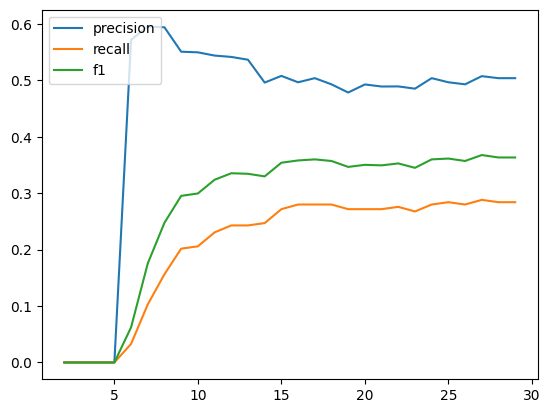

In [30]:
plt.plot(range(2,30), scores_precision,  label="precision")
plt.plot(range(2,30), scores_recall , label="recall")
plt.plot(range(2,30), scores_f1 , label="f1")
plt.legend(loc="upper left")

In [31]:
clf = RandomForestClassifier(max_depth=12, random_state=111)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198049
           1       0.54      0.24      0.34       243

    accuracy                           1.00    198292
   macro avg       0.77      0.62      0.67    198292
weighted avg       1.00      1.00      1.00    198292

[[197999     50]
 [   184     59]]


# Reverse evaluation on Bacteroides 

In [33]:
pattern_reverse = os.path.join(directory, '*reverse*')

In [34]:
files = glob.glob(pattern_reverse)

df_reverse = {}

for condition in conditions:
    file_list = []
    for file_path in files:
        if(condition in str(file_path)):
            file_list += [file_path]
    print(file_list)
    df_reverse[condition] = ops.parse_for_prediction(file_list, reverse= True)

['data_bacteroides/Subset_OnlyChrom\\ELP_S1_P1_reverse.wig', 'data_bacteroides/Subset_OnlyChrom\\ELP_S2_p1_reverse.wig', 'data_bacteroides/Subset_OnlyChrom\\ELP_S3_p1_reverse.wig']
['data_bacteroides/Subset_OnlyChrom\\MLP_S4_p1_reverse.wig', 'data_bacteroides/Subset_OnlyChrom\\MLP_S5_p1_reverse.wig', 'data_bacteroides/Subset_OnlyChrom\\MLP_S6_p1_reverse.wig']
['data_bacteroides/Subset_OnlyChrom\\Stat_S7_p1_reverse.wig', 'data_bacteroides/Subset_OnlyChrom\\Stat_S8_p1_reverse.wig', 'data_bacteroides/Subset_OnlyChrom\\Stat_S9_p1_reverse.wig']


In [35]:
condition_EL = masterTable[masterTable["Condition"].str.contains("EL")]
condition_EL = condition_EL[condition_EL["detected"] == 1]
condition_EL = condition_EL[condition_EL["Strand"] == "-"]
condition_ML = masterTable[masterTable["Condition"].str.contains("ML")]
condition_ML = condition_ML[condition_ML["detected"] == 1]
condition_ML = condition_ML[condition_ML["Strand"] == "-"]
condition_SP = masterTable[masterTable["Condition"].str.contains("static")]
condition_SP = condition_SP[condition_SP["detected"] == 1]
condition_SP = condition_SP[condition_SP["Strand"] == "-"]

In [36]:
tss_truth = {}
tss_truth["ELP"] = list(set(condition_EL["SuperPos"].values))
tss_truth["MLP"] = list(set(condition_ML["SuperPos"].values))
tss_truth["Stat"] = list(set(condition_SP["SuperPos"].values))

In [37]:
for condition in conditions:
    truth_indices = tss_truth[condition]

    labels = []
    for index in df_reverse[condition][0].index.values:
        if(index in truth_indices):
            labels += [1]
        else:
            labels += [0]
    df_reverse[condition][0]["label"] = labels

In [39]:
dfs = []
for df in df_reverse:
    dfs += [df_reverse[df][0]]

In [40]:
df_reverse = pd.concat(dfs, ignore_index=True)

In [41]:
df_reverse

,value,zscore,first gradient,second gradient,previous,label
0,1.0,67.45,-0.5,-0.25,1.0,0
1,3.0,202.35,-0.5,-0.25,3.0,0
2,2.0,134.90,-0.5,0.25,3.0,0
3,4.0,269.80,-0.5,-0.25,4.0,0
4,3.0,202.35,-0.5,0.25,4.0,0
...,...,...,...,...,...,...
665538,1.0,67.45,-0.5,0.50,2.0,0
665539,24.0,1618.80,-12.0,-6.00,24.0,0
665540,1.0,67.45,-0.5,-0.25,1.0,0
665541,1.0,67.45,-0.5,-0.25,1.0,0


In [42]:
X = df_reverse.drop('label', axis=1)  # Features

In [43]:
y = df_reverse['label']  # Labels

In [44]:
df_reverse["label"].value_counts()

label
0    663602
1      1941
Name: count, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

In [46]:
y_pred = clf.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    218978
           1       0.00      0.00      0.00       652

    accuracy                           1.00    219630
   macro avg       0.50      0.50      0.50    219630
weighted avg       0.99      1.00      1.00    219630

[[218767    211]
 [   651      1]]


In [48]:
scores_precision = []
scores_recall = []
scores_f1 = []
for depth in range(2, 30):

    clf_reverse = RandomForestClassifier(max_depth=depth, random_state=111)
    clf_reverse.fit(X_train, y_train)
    y_pred = clf_reverse.predict(X_test)
    scores_precision += [precision_score(y_test, y_pred)]
    scores_recall += [recall_score(y_test, y_pred)]
    scores_f1 += [f1_score(y_test, y_pred)]

C:\Users\julia\miniforge3\envs\teamprojekt\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


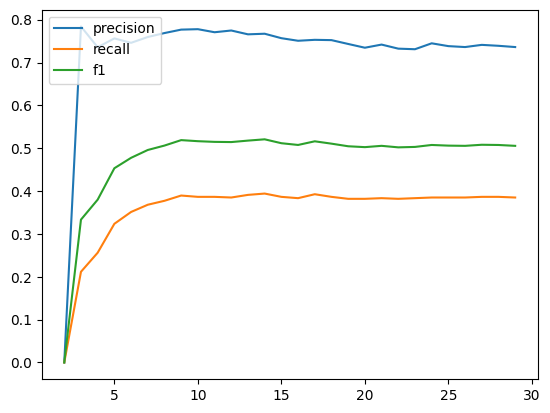

In [49]:
plt.plot(range(2,30), scores_precision,  label="precision")
plt.plot(range(2,30), scores_recall , label="recall")
plt.plot(range(2,30), scores_f1 , label="f1")
plt.legend(loc="upper left")

In [50]:
clf_reverse = RandomForestClassifier(max_depth=9, random_state=111)

In [51]:
clf_reverse.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=111)

In [52]:
y_pred = clf_reverse.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    218978
           1       0.78      0.39      0.52       652

    accuracy                           1.00    219630
   macro avg       0.89      0.69      0.76    219630
weighted avg       1.00      1.00      1.00    219630

[[218905     73]
 [   398    254]]


In [54]:
df_reverse = df_reverse[df_reverse["first gradient"] < 0]
df_reverse = df_reverse[df_reverse["zscore"] > 0]

In [55]:
X = df_reverse.drop('label', axis=1)  # Features

In [56]:
y = df_reverse['label']  # Labels

In [57]:
clf_reverse = RandomForestClassifier(max_depth=9, random_state=111)

In [58]:
clf_reverse.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=111)

In [59]:
y_pred = clf_reverse.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    218978
           1       0.78      0.39      0.52       652

    accuracy                           1.00    219630
   macro avg       0.89      0.69      0.76    219630
weighted avg       1.00      1.00      1.00    219630

[[218905     73]
 [   398    254]]


In [77]:
import pickle

with open('../app/prediction/RandomForestClassifierTSSFilteredForward.pkl','wb') as f:
    pickle.dump(clf,f)
with open('../app/prediction/RandomForestClassifierTSSFilteredReverse.pkl','wb') as f:
    pickle.dump(clf_reverse,f)